In [12]:
import numpy as np                  
import pandas as pd      
import json
import platypus as plat        
from matplotlib import pyplot as plt
import pygmo as pg

In [13]:
# FIX
# FRONTS OF SIZE ONE HAVE A NON ZERO NORM D-SCORE

In [14]:
R_1_0 = pd.json_normalize(json.load(open("1.0-FLA-RANDOM.json"))["data"])
R_0_5 = pd.json_normalize(json.load(open("0.5-FLA-RANDOM.json"))["data"])
R_0_1 = pd.json_normalize(json.load(open("0.1-FLA-RANDOM.json"))["data"])
R_0_01 = pd.json_normalize(json.load(open("0.01-FLA-RANDOM.json"))["data"])
R_0_001 = pd.json_normalize(json.load(open("0.001-FLA-RANDOM.json"))["data"])
R_0_0001 = pd.json_normalize(json.load(open("0.0001-FLA-RANDOM.json"))["data"])

MS_1_0 = pd.json_normalize(json.load(open("1.0-FLA-MORE_SLACK.json"))["data"])
MS_0_5 = pd.json_normalize(json.load(open("0.5-FLA-MORE_SLACK.json"))["data"])
MS_0_1 = pd.json_normalize(json.load(open("0.1-FLA-MORE_SLACK.json"))["data"])
MS_0_01 = pd.json_normalize(json.load(open("0.01-FLA-MORE_SLACK.json"))["data"])
MS_0_001 = pd.json_normalize(json.load(open("0.001-FLA-MORE_SLACK.json"))["data"])
MS_0_0001 = pd.json_normalize(json.load(open("0.0001-FLA-MORE_SLACK.json"))["data"])

FileNotFoundError: [Errno 2] No such file or directory: '1.0-FLA-MORE_SLACK.json'

In [ ]:
R_0_1

In [ ]:
#front must be a 2d matrix
# calculates the HV of a front
def front_hv(front):
    inver = [] # make all objective cost negative
    for row in front:
        temp_row = []
        for val in row:
            temp_row.append(-val)
    inver.append(temp_row)
    
    ref = [0] * len(front[0]) # always use reference point {0, 0, ..., 0}
    hv = pg.hypervolume(inver) #initialize hypervolume object
    # Sometimes the front is too small to use 
    try: 
        h = hv.compute(ref)
    except ValueError:
        h = -1
        print("-----------------------", "\n", "no good ref point")
        print(front)
    return h

In [ ]:
def DF_HV(df):
    fronts = df["front"].to_list()
    HV = []
    for front in fronts:
        HV.append(front_hv(front))
    return HV

In [7]:
# Hypervolumen
R_1_0_hv = DF_HV(R_1_0)
R_0_5_hv = DF_HV(R_0_5)
R_0_1_hv = DF_HV(R_0_1)
R_0_01_hv = DF_HV(R_0_01)
R_0_001_hv = DF_HV(R_0_001)
R_0_0001_hv = DF_HV(R_0_0001)

MS_1_0_hv = DF_HV(MS_1_0)
MS_0_5_hv = DF_HV(MS_0_5)
MS_0_1_hv = DF_HV(MS_0_1)
MS_0_01_hv = DF_HV(MS_0_01)
MS_0_001_hv = DF_HV(MS_0_001)
MS_0_0001_hv = DF_HV(MS_0_0001)

NameError: name 'DF_HV' is not defined

In [8]:
# Avg Hypervolume
R_1_0_hv_avg = np.mean(R_1_0_hv)
R_0_5_hv_avg = np.mean(R_0_5_hv)
R_0_1_hv_avg = np.mean(R_0_1_hv)
R_0_01_hv_avg = np.mean(R_0_01_hv)
R_0_001_hv_avg = np.mean(R_0_001_hv)
R_0_0001_hv_avg = np.mean(R_0_0001_hv)

MS_1_0_hv_avg = np.mean(MS_1_0_hv)
MS_0_5_hv_avg = np.mean(MS_0_5_hv)
MS_0_1_hv_avg = np.mean(MS_0_1_hv)
MS_0_01_hv_avg = np.mean(MS_0_01_hv)
MS_0_001_hv_avg = np.mean(MS_0_001_hv)
MS_0_0001_hv_avg = np.mean(MS_0_0001_hv)

NameError: name 'R_1_0_hv' is not defined

In [9]:
Col = [
"R_1_0", 
"R_0_5",
"R_0_1",
"R_0_01",
"R_0_001",
"R_0_0001"]
Val = [
R_1_0_hv_avg, 
R_0_5_hv_avg,
R_0_1_hv_avg,
R_0_01_hv_avg,
R_0_001_hv_avg,
R_0_0001_hv_avg]

plt.bar(Col,Val)
plt.title("RANDOM Average Hypervolume")
# plt.yscale("log")
plt.show()

Col = [
"MS_1_0", 
"MS_0_5",
"MS_0_1",
"MS_0_01",
"MS_0_001",
"MS_0_0001"]
Val = [
MS_1_0_hv_avg, 
MS_0_5_hv_avg,
MS_0_1_hv_avg,
MS_0_01_hv_avg,
MS_0_001_hv_avg,
MS_0_0001_hv_avg]

plt.bar(Col,Val)
plt.title("MORE_SLACK Average Hypervolume")
#plt.yscale("log")
plt.show()


NameError: name 'R_1_0_hv_avg' is not defined

In [10]:
print("RANDOM Avg Hypervolume")
print("1.0:    ", R_1_0_hv_avg)
print("0.5     ", R_0_5_hv_avg)
print("0.1     ", R_0_1_hv_avg)
print("0.01:   ", R_0_01_hv_avg)
print("0.001:  " ,R_0_001_hv_avg)
print("0.0001: ", R_0_0001_hv_avg)

print("-----")

print("MORE_SLACK Avg Hypervolume")
print("1.0:    ", MS_1_0_hv_avg)
print("0.5     ", MS_0_5_hv_avg)
print("0.1     ", MS_0_1_hv_avg)
print("0.01:   ", MS_0_01_hv_avg)
print("0.001:  " ,MS_0_001_hv_avg)
print("0.0001: ", MS_0_0001_hv_avg)

RANDOM Avg Hypervolume


NameError: name 'R_1_0_hv_avg' is not defined

In [11]:
R_1_0_sparsity = R_1_0["sparsity"].to_list()
R_0_5_sparsity = R_0_5["sparsity"].to_list()
R_0_1_sparsity = R_0_1["sparsity"].to_list()
R_0_01_sparsity = R_0_01["sparsity"].to_list()
R_0_001_sparsity = R_0_001["sparsity"].to_list()
R_0_0001_sparsity = R_0_0001["sparsity"].to_list()

MS_1_0_sparsity = MS_1_0["sparsity"].to_list()
MS_0_5_sparsity = MS_0_5["sparsity"].to_list()
MS_0_1_sparsity = MS_0_1["sparsity"].to_list()
MS_0_01_sparsity = MS_0_01["sparsity"].to_list()
MS_0_001_sparsity = MS_0_001["sparsity"].to_list()
MS_0_0001_sparsity = MS_0_0001["sparsity"].to_list()

NameError: name 'MS_1_0' is not defined

In [62]:
R_1_0_sparsity_avg = np.mean(R_1_0_sparsity)
R_0_5_sparsity_avg = np.mean(R_0_5_sparsity)
R_0_1_sparsity_avg = np.mean(R_0_1_sparsity)
R_0_01_sparsity_avg = np.mean(R_0_01_sparsity)
R_0_001_sparsity_avg = np.mean(R_0_001_sparsity)
R_0_0001_sparsity_avg = np.mean(R_0_0001_sparsity)

MS_1_0_sparsity_avg = np.mean(MS_1_0_sparsity)
MS_0_5_sparsity_avg = np.mean(MS_0_5_sparsity)
MS_0_1_sparsity_avg = np.mean(MS_0_1_sparsity)
MS_0_01_sparsity_avg = np.mean(MS_0_01_sparsity)
MS_0_001_sparsity_avg = np.mean(MS_0_001_sparsity)
MS_0_0001_sparsity_avg = np.mean(MS_0_0001_sparsity)

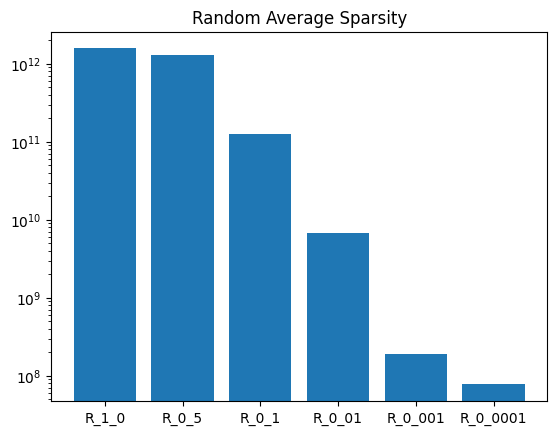

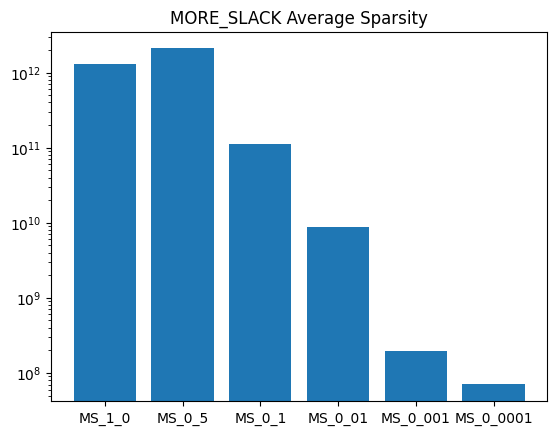

In [64]:
# Average Sparsity
Col = [
"R_1_0", 
"R_0_5",
"R_0_1",
"R_0_01",
"R_0_001",
"R_0_0001"]
Val = [
R_1_0_sparsity_avg, 
R_0_5_sparsity_avg,
R_0_1_sparsity_avg,
R_0_01_sparsity_avg,
R_0_001_sparsity_avg,
R_0_0001_sparsity_avg]

plt.bar(Col,Val)
plt.title("Random Average Sparsity")
plt.yscale("log")
plt.show()


Col = [
"MS_1_0", 
"MS_0_5",
"MS_0_1",
"MS_0_01",
"MS_0_001",
"MS_0_0001"]
Val = [
MS_1_0_sparsity_avg, 
MS_0_5_sparsity_avg,
MS_0_1_sparsity_avg,
MS_0_01_sparsity_avg,
MS_0_001_sparsity_avg,
MS_0_0001_sparsity_avg]

plt.bar(Col,Val)
plt.title("MORE_SLACK Average Sparsity")
plt.yscale("log")
plt.show()

In [57]:
print("Merge Method: Random Avg Sparsity")
print("1.0:    ", R_1_0_sparsity_avg)
print("0.5     ", R_0_5_sparsity_avg)
print("0.1     ", R_0_1_sparsity_avg)
print("0.01:   ", R_0_01_sparsity_avg)
print("0.001:  " ,R_0_001_sparsity_avg)
print("0.0001: ", R_0_0001_sparsity_avg)

print("-----")

print("Merge Method: MORE_SLACK Avg Sparsity")
print("1.0:    ", MS_1_0_sparsity_avg)
print("0.5     ", MS_0_5_sparsity_avg)
print("0.1     ", MS_0_1_sparsity_avg)
print("0.01:   ", MS_0_01_sparsity_avg)
print("0.001:  " ,MS_0_001_sparsity_avg)
print("0.0001: ", MS_0_0001_sparsity_avg)

Merge Method: Random Avg Sparsity
1.0:     1572396000000.0
0.5      1298386744000.0
0.1      125181840240.0
0.01:    6672121640.0
0.001:   189828049.88
0.0001:  77189245.22399999
-----
Merge Method: MORE_SLACK Avg Sparsity
1.0:     1297948000000.0
0.5      2090551449200.0
0.1      111855144960.0
0.01:    8770182530.8
0.001:   198188678.16
0.0001:  70141270.33600001


In [22]:
# time
R_1_0_time = R_1_0["time"].to_list()
R_0_5_time = R_0_5["time"].to_list()
R_0_1_time = R_0_1["time"].to_list()
R_0_01_time = R_0_01["time"].to_list()
R_0_001_time = R_0_001["time"].to_list()
R_0_0001_time = R_0_0001["time"].to_list()

MS_1_0_time = MS_1_0["time"].to_list()
MS_0_5_time = MS_0_5["time"].to_list()
MS_0_1_time = MS_0_1["time"].to_list()
MS_0_01_time = MS_0_01["time"].to_list()
MS_0_001_time = MS_0_001["time"].to_list()
MS_0_0001_time = MS_0_0001["time"].to_list()

In [58]:
print("Random avg 1.00 runtime:  ", np.mean(R_1_0_time), "ms")
print("Random avg 0.50 runtime:  ", np.mean(R_0_5_time), "ms")
print("Random avg 0.10 runtime:  ", np.mean(R_0_1_time), "ms")
print("Random avg 0.01 runtime:  ", np.mean(R_0_001_time), "ms")
print("Random avg 0.001 runtime: ", np.mean(R_0_0001_time), "ms")

print("-----")

print("Random avg 1.00 runtime:  ", np.mean(MS_1_0_time), "ms")
print("Random avg 0.50 runtime:  ", np.mean(MS_0_5_time), "ms")
print("Random avg 0.10 runtime:  ", np.mean(MS_0_1_time), "ms")
print("Random avg 0.01 runtime:  ", np.mean(MS_0_001_time), "ms")
print("Random avg 0.001 runtime: ", np.mean(MS_0_0001_time), "ms")

Random avg 1.00 runtime:   544.88 ms
Random avg 0.50 runtime:   3203.88 ms
Random avg 0.10 runtime:   73072.84 ms
Random avg 0.01 runtime:   225625.68 ms
Random avg 0.001 runtime:  237332.12 ms
-----
Random avg 1.00 runtime:   352.96 ms
Random avg 0.50 runtime:   1423.96 ms
Random avg 0.10 runtime:   33308.56 ms
Random avg 0.01 runtime:   223713.24 ms
Random avg 0.001 runtime:  235654.84 ms


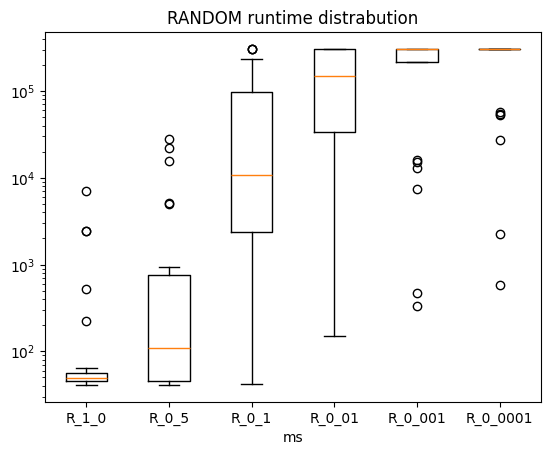

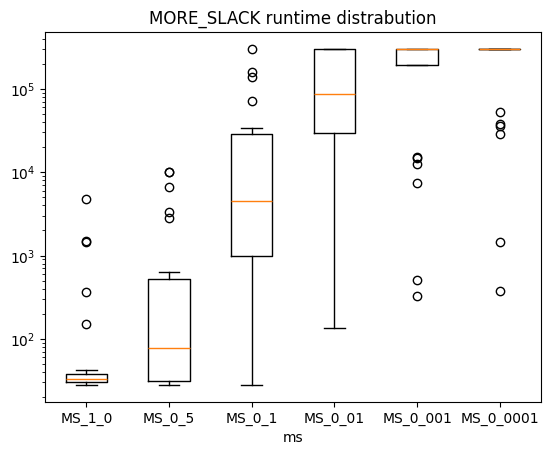

In [70]:
label = ["R_1_0", "R_0_5", "R_0_1", "R_0_01", "R_0_001", "R_0_0001"]
runtimes = [R_1_0_time, R_0_5_time, R_0_1_time, R_0_01_time, R_0_001_time, R_0_0001_time]

plt.boxplot(runtimes, tick_labels=label)
plt.yscale("log")
plt.xlabel("ms")
plt.title("RANDOM runtime distrabution")
plt.show()

label = ["MS_1_0", "MS_0_5", "MS_0_1", "MS_0_01", "MS_0_001", "MS_0_0001"]
runtimes = [MS_1_0_time, MS_0_5_time, MS_0_1_time, MS_0_01_time, MS_0_001_time, MS_0_0001_time]

plt.boxplot(runtimes, tick_labels=label)
plt.yscale("log")
plt.xlabel("ms")
plt.title("MORE_SLACK runtime distrabution")
plt.show()